# NYC Census Data Exploration

In [117]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm
import scipy.stats as stats
import seaborn as sns

In [118]:
censusdf = pd.read_csv('nyc_census_tracts.csv')

In [119]:
censusdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 36 columns):
CensusTract        2167 non-null int64
County             2167 non-null object
Borough            2167 non-null object
TotalPop           2167 non-null int64
Men                2167 non-null int64
Women              2167 non-null int64
Hispanic           2128 non-null float64
White              2128 non-null float64
Black              2128 non-null float64
Native             2128 non-null float64
Asian              2128 non-null float64
Citizen            2167 non-null int64
Income             2101 non-null float64
IncomeErr          2101 non-null float64
IncomePerCap       2121 non-null float64
IncomePerCapErr    2121 non-null float64
Poverty            2125 non-null float64
ChildPoverty       2107 non-null float64
Professional       2124 non-null float64
Service            2124 non-null float64
Office             2124 non-null float64
Construction       2124 non-null float64
Pro

In [120]:
censusdf.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


### Narrow dataframe down to columns of interest

In [121]:
briefdf = censusdf[['CensusTract', 'Borough', 'TotalPop', 'Women', 'Income', 'Transit']]

In [122]:
cleandf = briefdf.dropna(how='any')

In [123]:
cleandf.describe()

,CensusTract,TotalPop,Women,Income,Transit
count,2.101000e+03,2101.000000,2101.000000,2101.000000,2101.000000
mean,3.605462e+10,3998.266540,2095.968586,59101.320800,55.096050
std,2.591998e+07,2172.579526,1179.150247,28802.662945,16.181942
min,3.600500e+10,29.000000,13.000000,9829.000000,0.000000
25%,3.604703e+10,2455.000000,1272.000000,39073.000000,43.500000
50%,3.604712e+10,3623.000000,1871.000000,54505.000000,57.500000
75%,3.608103e+10,5002.000000,2602.000000,73272.000000,67.900000
max,3.608503e+10,28926.000000,15466.000000,244375.000000,100.000000


### Pulling in Census Block Location Data

In [124]:
locationdf = pd.read_csv('census_block_loc.csv')

In [125]:
locationdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38396 entries, 0 to 38395
Data columns (total 5 columns):
Latitude     38396 non-null float64
Longitude    38396 non-null float64
BlockCode    38396 non-null int64
County       38396 non-null object
State        38396 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 1.5+ MB


In [126]:
locationdf.head()

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ


### Merging the Datasets

In [127]:
locationdf['CensusTract'] = locationdf.BlockCode.astype('str').str[:11]

In [128]:
locationdf['CensusTract'] = locationdf.CensusTract.astype('int64')

In [129]:
locationdf.CensusTract.head(10)

0    34023007600
1    34023007600
2    34023007600
3    34023007600
4    34023007402
5    34023007402
6    34023007402
7    34023007402
8    34023007402
9    34023007402
Name: CensusTract, dtype: int64

In [130]:
mergedf = pd.merge(cleandf, locationdf, on='CensusTract', how='inner')

In [131]:
mergedf.sample(10)

,CensusTract,Borough,TotalPop,Women,Income,Transit,Latitude,Longitude,BlockCode,County,State
1696,36005046202,Bronx,9409,5416,40497.0,57.9,40.884774,-73.830452,360050462021009,Bronx,NY
3047,36047039200,Brooklyn,2807,1504,33125.0,45.4,40.595327,-73.963417,360470392002001,Kings,NY
4162,36047098200,Brooklyn,4124,2580,19720.0,74.0,40.651859,-73.893769,360470982002001,Kings,NY
4070,36047090600,Brooklyn,4318,2546,15674.0,68.9,40.669950,-73.909598,360470906001001,Kings,NY
1316,36005036901,Bronx,2276,1287,14821.0,65.1,40.844070,-73.890603,360050369011001,Bronx,NY
3876,36047074600,Brooklyn,2278,1075,82188.0,36.4,40.617940,-73.944422,360470746002005,Kings,NY
11703,36085029102,Staten Island,2814,1496,84559.0,25.2,40.611156,-74.197688,360850291021060,Richmond,NY
8400,36081099100,Queens,6234,3476,88793.0,21.7,40.787538,-73.805126,360810991004006,Queens,NY
1460,36005041900,Bronx,6951,3644,45127.0,71.1,40.875729,-73.881106,360050419002000,Bronx,NY
6817,36081050201,Queens,1427,788,74813.0,50.0,40.708392,-73.767136,360810502011010,Queens,NY


In [132]:
mergedf.shape

(11947, 11)

In [133]:
mergedf['%Women'] = mergedf['Women']/mergedf['TotalPop']

In [134]:
mergedf.head()

,CensusTract,Borough,TotalPop,Women,Income,Transit,Latitude,Longitude,BlockCode,County,State,%Women
0,36005000200,Bronx,5403,2744,72034.0,38.6,40.798844,-73.862111,360050002000001,Bronx,NY,0.507866
1,36005000200,Bronx,5403,2744,72034.0,38.6,40.798844,-73.858945,360050002000001,Bronx,NY,0.507866
2,36005000200,Bronx,5403,2744,72034.0,38.6,40.801106,-73.862111,360050002000001,Bronx,NY,0.507866
3,36005000200,Bronx,5403,2744,72034.0,38.6,40.801106,-73.858945,360050002000001,Bronx,NY,0.507866
4,36005000200,Bronx,5403,2744,72034.0,38.6,40.801106,-73.855779,360050002000001,Bronx,NY,0.507866


## Income Ranking

In [135]:
m = mergedf.Borough == 'Manhattan'
manhattan = mergedf[m]

highincome = manhattan.Income > 100000

highincomedf = manhattan[highincome]

incgroup = highincomedf.groupby(['CensusTract'])
incmeans = incgroup.agg({'Income': 'mean', 'TotalPop': 'mean'})

highincomehubs = incmeans.nlargest(11, 'Income')

highincomehubs['Station'] = ['77th St', '77th St', '96th St', '5th Ave', '5th Ave', 'Houston St', 
                          'Chambers St', 'Chambers St', '77th St', '14th St', '86th St' ]
highincomehubs

,Income,TotalPop,Station
CensusTract,,,
36061013000,244375.0,3277,77th St
36061014200,235455.0,4467,77th St
36061016001,222222.0,3861,96th St
36061011401,197500.0,1276,5th Ave
36061011202,192857.0,287,5th Ave
36061006900,183750.0,2604,Houston St
36061003100,183500.0,2673,Chambers St
36061031703,182401.0,8875,Chambers St
36061012800,175259.0,6226,77th St


(150000, 250000)

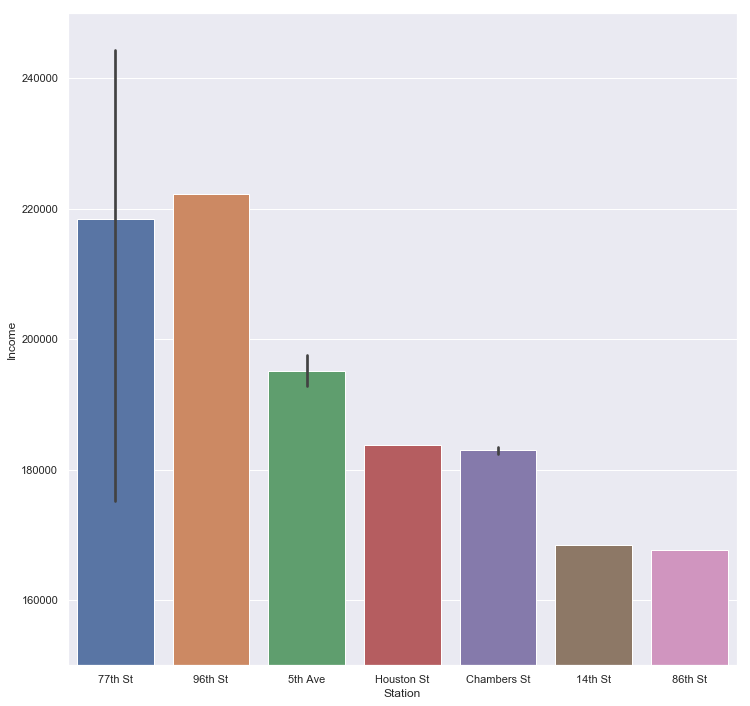

In [136]:
plt.figure(figsize=(12,12))
sns.set()
sns.barplot(x = 'Station',y='Income',data=highincomehubs);
plt.ylim(150000, 250000)

## % Women Ranking

In [137]:
m = mergedf.Borough == 'Manhattan'
manhattan = mergedf[m]

womengroup = manhattan.groupby(['CensusTract'])
womenmeans = womengroup.agg({'%Women': 'mean', 'TotalPop': 'mean'})


womenmeans.nlargest(20, '%Women')

,%Women,TotalPop
CensusTract,,
36061020500,0.669166,5069
36061018900,0.625341,12825
36061024302,0.616107,7239
36061017700,0.613947,9522
36061022302,0.613928,3432
36061011203,0.613208,1166
36061008300,0.609570,3929
36061010900,0.607527,186
36061001002,0.607172,6051


In [138]:
m = mergedf.Borough == 'Manhattan'
manhattan = mergedf[m]

womennumgroup = manhattan.groupby(['CensusTract'])
womennummeans = womengroup.agg({'Women': 'mean', '%Women': 'mean'})


topwomenhubs = womennummeans.nlargest(11, '%Women')

topwomenhubs['Station'] = ['116th St - Columbia Univ', '103rd St', '155th St','96th St', '137th St - City College', 
                             'Lexington Ave - 59th St', '14th St', '34th St - Penn Station', '155th St', '145th St',
                             'Lexington Ave - 86th St']
topwomenhubs

,Women,%Women,Station
CensusTract,,,
36061020500,3392,0.669166,116th St - Columbia Univ
36061018900,8020,0.625341,103rd St
36061024302,4460,0.616107,155th St
36061017700,5846,0.613947,96th St
36061022302,2107,0.613928,137th St - City College
36061011203,715,0.613208,Lexington Ave - 59th St
36061008300,2395,0.609570,14th St
36061010900,113,0.607527,34th St - Penn Station
36061001002,3674,0.607172,155th St


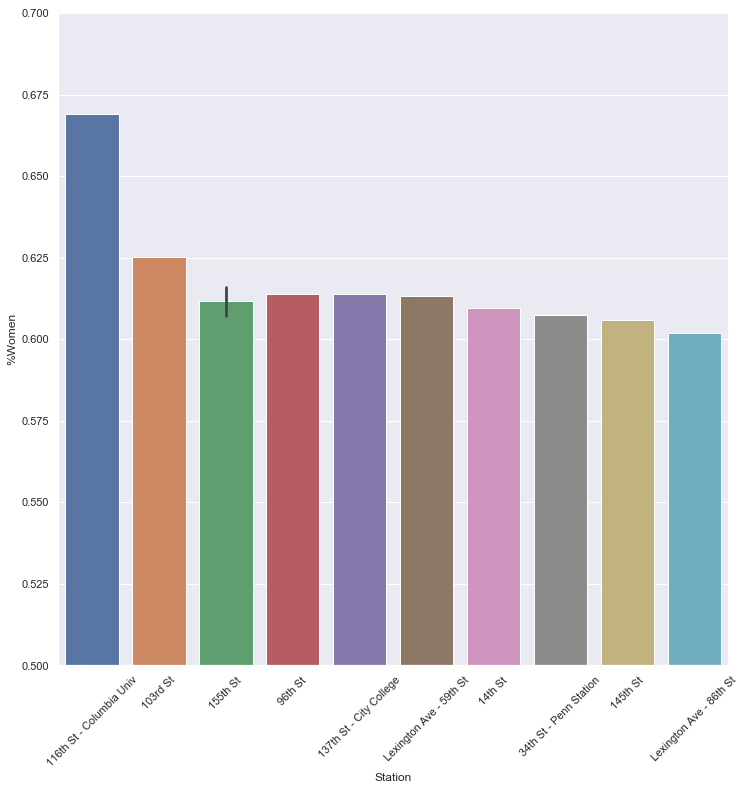

In [139]:
plt.figure(figsize=(12,12))
sns.set()
sns.barplot(x = 'Station',y='%Women',data=topwomenhubs);
plt.ylim(0.5, 0.7)
plt.xticks(rotation=45);

## Largest Public Transit Areas

In [140]:
mergedf['TransitNum'] = mergedf['TotalPop'] * (mergedf['Transit'] / 100)
mergedf.head()

,CensusTract,Borough,TotalPop,Women,Income,Transit,Latitude,Longitude,BlockCode,County,State,%Women,TransitNum
0,36005000200,Bronx,5403,2744,72034.0,38.6,40.798844,-73.862111,360050002000001,Bronx,NY,0.507866,2085.558
1,36005000200,Bronx,5403,2744,72034.0,38.6,40.798844,-73.858945,360050002000001,Bronx,NY,0.507866,2085.558
2,36005000200,Bronx,5403,2744,72034.0,38.6,40.801106,-73.862111,360050002000001,Bronx,NY,0.507866,2085.558
3,36005000200,Bronx,5403,2744,72034.0,38.6,40.801106,-73.858945,360050002000001,Bronx,NY,0.507866,2085.558
4,36005000200,Bronx,5403,2744,72034.0,38.6,40.801106,-73.855779,360050002000001,Bronx,NY,0.507866,2085.558


In [141]:
m = mergedf.Borough == 'Manhattan'
manhattan = mergedf[m]

transitgroup = manhattan.groupby(['CensusTract'])
transitmeans = transitgroup.agg({'TransitNum': 'mean'})

toptransithubs = transitmeans.nlargest(11, 'TransitNum')

toptransithubs['Station'] = ['163rd St', '96th & 2nd Ave', '103rd St', '1st Ave', 
                             '86th St', '181st St', '86th St & 7th St', '207th St & Dyckman St', '168th St',
                             '86th St', '137th St - City College']
toptransithubs

,TransitNum,Station
CensusTract,,
36061024500,10436.533,163rd St
36061015400,9859.003,96th & 2nd Ave
36061018900,9708.525,103rd St
36061004400,9412.200,1st Ave
36061013600,9242.160,86th St
36061026100,9177.280,181st St
36061013800,8371.032,86th St & 7th St
36061029100,8179.431,207th St & Dyckman St
36061025300,8142.252,168th St


(7000, 11000)

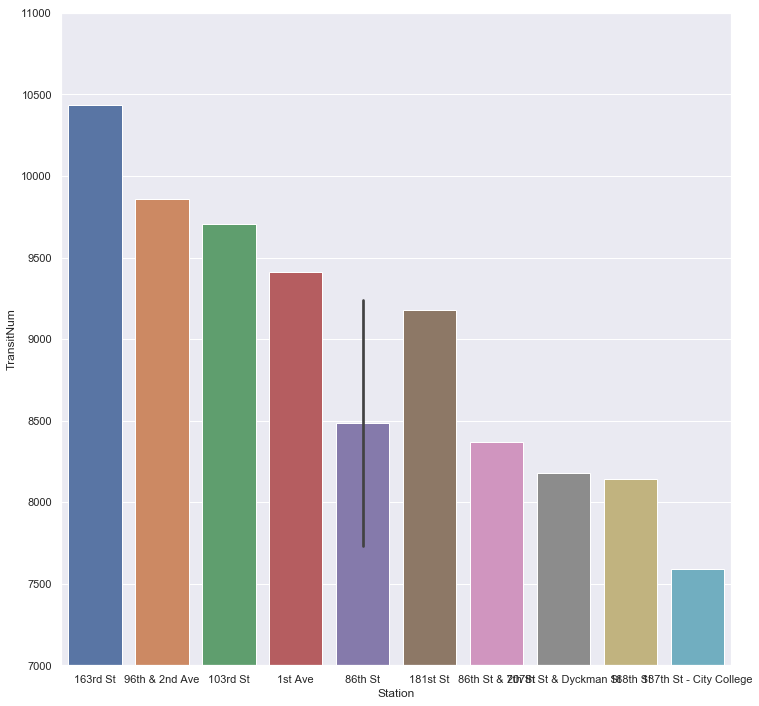

In [142]:
plt.figure(figsize=(12,12))
sns.set()
sns.barplot(x = 'Station',y ='TransitNum',data=toptransithubs);
plt.ylim(7000, 11000)

### Combined Plot

In [143]:
justhubdf = mergedf[mergedf['CensusTract'].isin([36061013000, 36061014200, 36061016001, 36061011401, 36061011202,
                                            36061006900, 36061003100, 36061031703, 36061012800, 36061005200,
                                            36061014801, 36061020500, 36061018900, 36061024302, 36061017700,
                                            36061022302, 36061011203, 36061008300, 36061010900, 36061001002, 
                                            36061021400, 36061015002, 36061024500, 36061015400, 36061018900,
                                            36061004400, 36061013600, 36061026100, 36061013800, 36061029100,
                                            36061025300, 36061017500, 36061022500])]
justhubdf.head()

,CensusTract,Borough,TotalPop,Women,Income,Transit,Latitude,Longitude,BlockCode,County,State,%Women,TransitNum
4575,36061001002,Manhattan,6051,3674,17560.0,70.5,40.712915,-73.969749,360610010020001,New York,NY,0.607172,4265.955
4576,36061001002,Manhattan,6051,3674,17560.0,70.5,40.715176,-73.976080,360610010023000,New York,NY,0.607172,4265.955
4577,36061001002,Manhattan,6051,3674,17560.0,70.5,40.715176,-73.972915,360610010020001,New York,NY,0.607172,4265.955
4578,36061001002,Manhattan,6051,3674,17560.0,70.5,40.715176,-73.969749,360610010020001,New York,NY,0.607172,4265.955
4579,36061001002,Manhattan,6051,3674,17560.0,70.5,40.717437,-73.979246,360610010021003,New York,NY,0.607172,4265.955


In [144]:
incomemergedf = pd.merge(justhubdf, highincomehubs, on='CensusTract', how='outer')

womenmergedf = pd.merge(incomemergedf, topwomenhubs, on='CensusTract', how='outer')

transitmergedf = pd.merge(womenmergedf, toptransithubs, on='CensusTract', how='outer')

cleandf = transitmergedf.drop(columns=['Income_y', 'TotalPop_y', 'Women_y', 'TransitNum_y',
                                       '%Women_y', 'BlockCode', 'TransitNum_y'])

cleandf.fillna('', inplace=True)

cleandf['Stations'] = cleandf['Station_y'] + cleandf['Station_x'] + cleandf['Station']

cleanerdf = cleandf.drop(columns=['Station_x', 'Station_y', 'Station'])

cleanerdf.rename(columns={'TotalPop_x': 'TotalPop', 'Women_x': 'Women', 'Income_x': 'Income', 
                          '%Women_x': '%Women', 'TransitNum_x': 'TransitNum'}, inplace=True)
cleanerdf.sample(10)

,CensusTract,Borough,TotalPop,Women,Income,Transit,Latitude,Longitude,County,State,%Women,TransitNum,Stations
16,36061004400,Manhattan,16200,9307,93010.0,58.1,40.728744,-73.969749,New York,NY,0.574506,9412.200,1st Ave
50,36061013600,Manhattan,15880,9337,108587.0,58.2,40.773970,-73.950754,New York,NY,0.587972,9242.160,86th St
106,36061024500,Manhattan,16231,7916,35394.0,64.3,40.837286,-73.941256,New York,NY,0.487709,10436.533,163rd St
92,36061022302,Manhattan,3432,2107,24241.0,71.6,40.823719,-73.963417,New York,NY,0.613928,2457.312,137th St - City College
49,36061013600,Manhattan,15880,9337,108587.0,58.2,40.771709,-73.944422,New York,NY,0.587972,9242.160,86th St
5,36061001002,Manhattan,6051,3674,17560.0,70.5,40.717437,-73.976080,New York,NY,0.607172,4265.955,155th St
100,36061024302,Manhattan,7239,4460,20371.0,68.6,40.830503,-73.938090,New York,NY,0.616107,4965.954,155th St
118,36061031703,Manhattan,8875,4408,182401.0,45.1,40.715176,-74.014070,New York,NY,0.496676,4002.625,Chambers St
83,36061020500,Manhattan,5069,3392,111875.0,36.0,40.812412,-73.972915,New York,NY,0.669166,1824.840,116th St - Columbia Univ
116,36061031703,Manhattan,8875,4408,182401.0,45.1,40.715176,-74.020402,New York,NY,0.496676,4002.625,Chambers St


In [145]:
hubsdf = cleanerdf.filter(['%Women', 'Income', 'TransitNum', 'Stations'])

hubs = hubsdf.drop_duplicates()

hubs.head(10)

,%Women,Income,TransitNum,Stations
0,0.607172,17560.0,4265.955,155th St
7,0.531987,183500.0,1467.477,Chambers St
10,0.574506,93010.0,9412.200,1st Ave
23,0.509662,168375.0,1803.384,14th St
26,0.444316,183750.0,1169.196,Houston St
33,0.609570,69303.0,2671.720,14th St
36,0.607527,135750.0,90.024,34th St - Penn Station
38,0.501742,192857.0,29.561,5th Ave
39,0.613208,128083.0,315.986,Lexington Ave - 59th St
41,0.550157,197500.0,472.120,5th Ave


In [146]:
stationgroup = hubs.groupby(['Stations'])
stationsdf = stationgroup.agg({'%Women': 'mean', 'Income': 'mean', 'TransitNum': 'mean'})
stationsdf.reset_index(inplace=True)

stationsdf.head(10)

,Stations,%Women,Income,TransitNum
0,103rd St103rd St,0.625341,28158.0,9708.5250
1,116th St - Columbia Univ,0.669166,111875.0,1824.8400
2,137th St - City College,0.570719,36199.0,5023.0515
3,145th St,0.605920,44405.0,2342.4530
4,14th St,0.559616,118839.0,2237.5520
5,155th St,0.611640,18965.5,4615.9545
6,163rd St,0.487709,35394.0,10436.5330
7,168th St,0.498728,36780.0,8142.2520
8,181st St,0.516968,29702.0,9177.2800
9,1st Ave,0.574506,93010.0,9412.2000


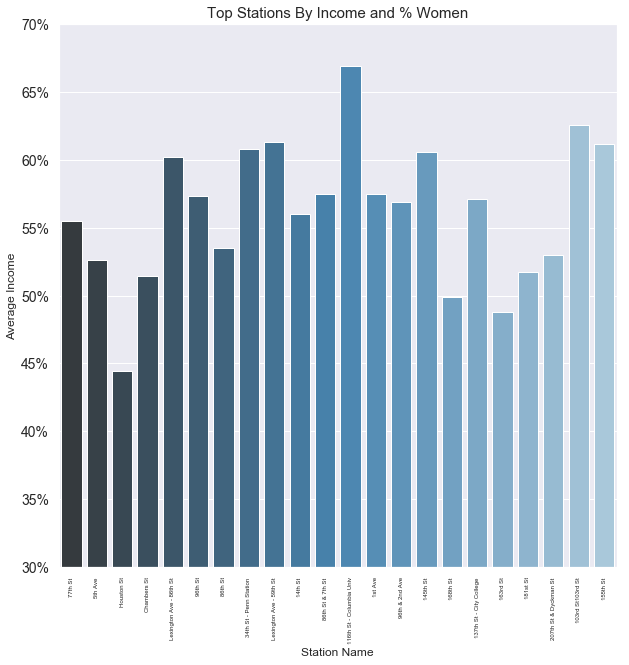

In [161]:
stationsdf.sort_values(by='Income', ascending=False, inplace=True)
plt.figure(figsize=(10,10))
g = sns.barplot(x = 'Stations', y = '%Women', data = stationsdf, palette = "Blues_d")
plt.title('Top Stations By Income and % Women', fontsize = 15)
plt.xlabel('Station Name')
plt.ylabel('Average Income')
plt.ylim(0.3, 0.7)
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 6)
g.set_yticklabels(g.get_yticklabels(), fontsize = 14)
g.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0%}'));